# Google Data Analytics Capstone Project

The Google Data Analytics Course capstone project that I will be doing is the Cyclistic bike-share analysis case study.
The goal of this case study is to identify ways to maximize the number of annual memberships.  Cyclistic would like to
identify how casual riders and annual members use the bikes differently. 
 
Cyclistic has three main questions for this:
1.       How do annual members and casual riders use Cyclistic bikes differently?  
1.       Why would casual riders buy Cylistic annual memberships?
1.       How can Cyclistic use digital media to influence casual riders to become members?
 
The main objective I will be focusing on for this project is identifying how casual riders and annual members are using the bikes differently.
 
We will use the data from 2021's trip data to find insights to guide the executive team's decision making process. 

The data comes Motivate International Inc under the below license:

https://ride.divvybikes.com/data-license-agreement

In [1]:
#Standard python libraries used for data analysis imported below.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import os
import datetime
import seaborn as sns

# Setting the path for 2021's bike trip data and then putting them into a list of files.  
path = '../input/bike-trip-data/'
files = glob.glob(os.path.join(path, "*.csv"))

# Creating data frame for each file in the list, then adding all of the files together into one data frame.
df_staging = (pd.read_csv(file) for file in files)
df = pd.concat(df_staging, ignore_index=True)

# We can take a peak at the first ten rows of our dataset to make sure everything looks as expected.  
display(df.head(10))


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.89,-87.63,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.93,-87.71,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.94,-87.72,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.92,-87.69,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.89,-87.69,member
5,7176307BBC097313,electric_bike,2021-10-21 16:57:37,2021-10-21 17:11:58,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.93,-87.70,member
6,E965A041511793A0,electric_bike,2021-10-21 17:46:38,2021-10-21 17:49:19,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.93,-87.70,member
7,E41D986E83D7B7CC,electric_bike,2021-10-20 23:30:13,2021-10-20 23:38:34,NaN,NaN,NaN,NaN,41.890000,-87.690000,41.89,-87.71,member
8,E189D96E36E6FDFD,electric_bike,2021-10-21 18:17:00,2021-10-21 18:24:28,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.91,-87.70,member
9,17019B8A4C753A83,electric_bike,2021-10-06 18:47:40,2021-10-06 18:56:09,NaN,NaN,NaN,NaN,41.780000,-87.580000,41.80,-87.58,member


Now that we have all the csv's in one dataframe, we can start adding columns and cleaning up the data.  I'm going to add a column for the day of weeks rides started on, a ride_length, and the month the rides started in.  

In [2]:
# Add column for day_of_week to each row
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['day_of_week'] = df['started_at'].dt.day_name()

# Add column for ride_length to each row
df['ride_length'] = (df['ended_at'] - df['started_at'])

# Add column for the month the ride started in.
df['month'] = df['started_at'].dt.month_name()
display(df.head(10))

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,ride_length,month
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.89,-87.63,member,Friday,0 days 00:03:08,October
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.93,-87.71,member,Thursday,0 days 00:01:37,October
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.94,-87.72,member,Saturday,0 days 00:07:47,October
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.92,-87.69,member,Saturday,0 days 00:01:15,October
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.89,-87.69,member,Wednesday,0 days 00:08:16,October
5,7176307BBC097313,electric_bike,2021-10-21 16:57:37,2021-10-21 17:11:58,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.93,-87.70,member,Thursday,0 days 00:14:21,October
6,E965A041511793A0,electric_bike,2021-10-21 17:46:38,2021-10-21 17:49:19,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.93,-87.70,member,Thursday,0 days 00:02:41,October
7,E41D986E83D7B7CC,electric_bike,2021-10-20 23:30:13,2021-10-20 23:38:34,NaN,NaN,NaN,NaN,41.890000,-87.690000,41.89,-87.71,member,Wednesday,0 days 00:08:21,October
8,E189D96E36E6FDFD,electric_bike,2021-10-21 18:17:00,2021-10-21 18:24:28,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.91,-87.70,member,Thursday,0 days 00:07:28,October
9,17019B8A4C753A83,electric_bike,2021-10-06 18:47:40,2021-10-06 18:56:09,NaN,NaN,NaN,NaN,41.780000,-87.580000,41.80,-87.58,member,Wednesday,0 days 00:08:29,October


Let's take a look and make sure the data is clean by removing missing data.  I will also be removing any rows with negative ride lengths since that points the data being invalid.  

In [3]:
#Getting rid of all entries that have missing data
df = df.dropna()

#Removing negative ride lengths.
df = df[df['ride_length'] >= pd.Timedelta(0)]
display(df.head(10))

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,ride_length,month
25,614B15BC42810184,docked_bike,2021-10-05 10:56:05,2021-10-05 11:38:48,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,Tuesday,0 days 00:42:43,October
69,ADCC6E3CF9C04688,classic_bike,2021-10-06 13:55:33,2021-10-06 13:58:16,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,member,Wednesday,0 days 00:02:43,October
76,6184CC57243AEF3C,docked_bike,2021-10-16 10:19:43,2021-10-16 12:01:20,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,Saturday,0 days 01:41:37,October
84,DE02D027BAC5C820,docked_bike,2021-10-24 11:03:34,2021-10-24 13:10:01,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,Sunday,0 days 02:06:27,October
94,E7C9BADDF2308D0D,classic_bike,2021-10-23 23:33:22,2021-10-23 23:35:27,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,41.889177,-87.638506,41.888716,-87.644448,member,Saturday,0 days 00:02:05,October
95,9EBCB4A4586CD65E,classic_bike,2021-10-25 10:59:26,2021-10-25 11:50:41,Sheridan Rd & Noyes St (NU),604,Sheridan Rd & Noyes St (NU),604,42.058239,-87.677432,42.058239,-87.677432,member,Monday,0 days 00:51:15,October
125,712AD4863BE59CB3,docked_bike,2021-10-01 14:22:32,2021-10-01 15:48:22,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,Friday,0 days 01:25:50,October
180,DE2E496B8BA00BD0,classic_bike,2021-10-21 12:29:24,2021-10-21 12:49:47,Kingsbury St & Kinzie St,KA1503000043,Aberdeen St & Jackson Blvd,13157,41.889177,-87.638506,41.877726,-87.654787,member,Thursday,0 days 00:20:23,October
181,E2C3E943AF52A3B8,classic_bike,2021-10-08 21:03:16,2021-10-08 21:26:00,Aberdeen St & Jackson Blvd,13157,Aberdeen St & Jackson Blvd,13157,41.877726,-87.654787,41.877726,-87.654787,member,Friday,0 days 00:22:44,October
192,52AEB47AED45A2DB,electric_bike,2021-10-31 07:50:01,2021-10-31 08:15:30,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.901134,-87.623695,41.900972,-87.623735,member,Sunday,0 days 00:25:29,October


Now we can take a look at some descriptive stats on the data.  We can see the various data types for each column in our dataframe, as well as the max, minimum, median, mean, and standard deviation.  We can see that Saturday is the most popular day for 2021's rides.  We can also see that the average ride length for non-members is higher than the average of members.

In [4]:
#Checking the data types of all of the columns.
result = df.dtypes
print(result, '\n', '\n')

#Describing stats of ride length column.
df_stats = df['ride_length'].describe()
print(df_stats, '\n', '\n')

#Output most common day of week for rides.
print(df['day_of_week'].mode(), '\n', '\n')

#Output average ride length for members.
df_member = df.query("member_casual=='member'")
df_member_mean = df_member['ride_length'].mean()
print("The average ride length of members is ", df_member_mean)

#Output average ride length for casual riders.
df_casual = df.query("member_casual=='casual'")
df_casual_mean = df_casual['ride_length'].mean()
print("The average ride length of non-members is ", df_casual_mean)

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
day_of_week                    object
ride_length           timedelta64[ns]
month                          object
dtype: object 
 

count                      4588186
mean     0 days 00:21:48.692097704
std      0 days 03:04:25.636762104
min                0 days 00:00:00
25%                0 days 00:06:57
50%                0 days 00:12:12
75%                0 days 00:22:07
max               38 days 20:24:09
Name: ride_length, dtype: object 
 

0    Saturday
dtype: object 
 

The average ride length o

Let's see which days have the most number of rides for each member type.  We can see that Saturdays have the most rides for non-members, and Wednesdays have the most for members.  Weekdays seem to be where members get the most use out of their bike rides, while weekends are much more popular with non-members.  

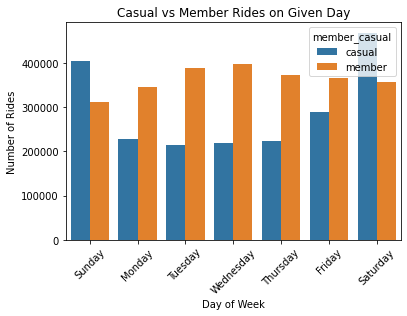

In [5]:
# Let's take a look at the number of rides on a given day for casual riders and members.
plt.title("Casual vs Member Rides on Given Day")
chart = sns.countplot(x='day_of_week', hue='member_casual', 
                      order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],
                      data=df)
plt.ylabel("Number of Rides")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show(chart)

If we group the data together by member type and the day of the week, we can see the average ride length for each day by member type.  It looks like non-members have longer rides on average than members do.  This might be because non-members are riding for exercise or entertainment, while members might be focused on commuting to and from work or for running errands.  

,member_casual,day_of_week,avg_ride_length
0,casual,Friday,30.0
1,casual,Monday,32.0
2,casual,Saturday,34.0
3,casual,Sunday,37.0
4,casual,Thursday,28.0
5,casual,Tuesday,28.0
6,casual,Wednesday,28.0
7,member,Friday,12.0
8,member,Monday,12.0
9,member,Saturday,14.0


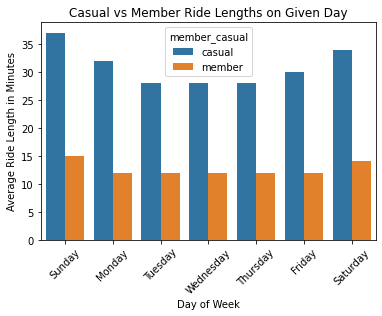

In [6]:
#Grouping the data by member type and day of week, then creating an average ride length based off of those groups.
df2 = df.groupby(['member_casual', 'day_of_week'], as_index=False).agg(avg_ride_length=('ride_length', 'mean'))
df2['avg_ride_length'] = df2['avg_ride_length'].astype('timedelta64[m]')
display(df2.head(20))

plt.title("Casual vs Member Ride Lengths on Given Day")
chart = sns.barplot(x='day_of_week', y='avg_ride_length', hue='member_casual', 
                      order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],
                      data=df2)
plt.ylabel("Average Ride Length in Minutes")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show(chart)

We can also take a peek at what months the two groups frequent for rides.  It looks like the summer months are the most popular with both groups, with July being the highest for non-members, and August being the highest for members.  Non-member usage starts to plummet for the winter months, whereas member usage goes down, but not as drastically.  This could mean that non-members using the rides for exercise or entertainment stop once it gets too cold, while some members keep commuting even in colder months.  

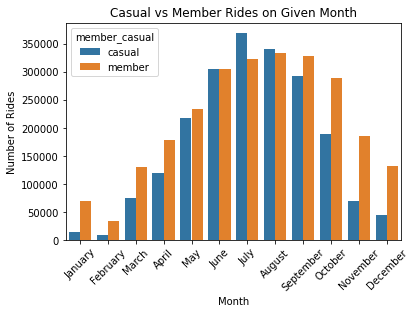

In [7]:
# Let's take a look at the number of rides on a given month for casual riders and members.
plt.title("Casual vs Member Rides on Given Month")
chart = sns.countplot(x='month', hue='member_casual', 
                      order=["January", "February", "March", "April", "May", "June", "July", "August", "September",
                             "October", "November", "December"],
                      data=df)
plt.ylabel("Number of Rides")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show(chart)

There are three different bike types in the data provided: docked, classic, and electric.  Classic bikes were the most popular for both groups, while the other two types were infrequently used in comparison.  

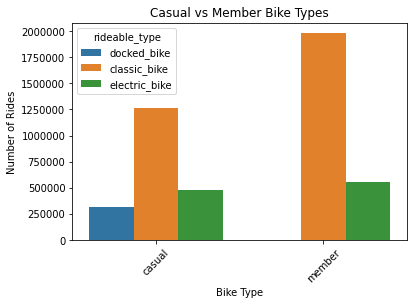

In [8]:
#Casual vs Member Bike Type Usage
plt.title("Casual vs Member Bike Types")
chart = sns.countplot(x='member_casual', hue='rideable_type', data=df)
plt.ylabel("Number of Rides")
plt.xlabel("Bike Type")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show(chart)

If we take a look at the percentage of members to non-members, we can see that 55% of users are members, while 45% are not.  While it's good that more users are members, it also leaves plenty of room for growth of membership.  

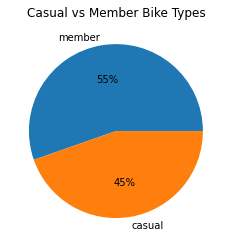

In [9]:
#Member type percentage
plt.title("Casual vs Member Bike Types")
chart = plt.pie(df['member_casual'].value_counts(), labels=(df['member_casual'].value_counts()).index, autopct='%.0f%%', data=df)
plt.show(chart)

# My recommendations to Cyclistic to improve the membership rate are the following:
1. Many of the non-members are mainly riding in the summer months, so there would likely be a benefit of running a promotion during the summer for joining the membership.
1. Many of the non-members are only using the weekends for rides, so it could be beneficial to have a discount on weekend for members only.
1. Non-members also use the docked bikes unlike current members, therefore it might increase membership to encourage those users by running a targeted promotion to them.
1. If not already implemented, a system to get a discount every X amount of rides for members would increase member loyalty as well as increase the likelihood of non-members to join.
1. Running targeted ads during the late spring to early summer months to non-members could also be beneficial. 